### **Vanishing gradient problem**

***For the derivatives of some activation functions the gradient can become smaller with every iteration rendering the neural network to either <br>completely unable to update its parameters or updating them very slowly***

***Take for instance where the gradient comes out to be 0.1 for every layer and we have 5 layers in our neural network***

In [1]:
l5_gradient = 0.1                   # Layer 5 gradient
l1_gradient =  l5_gradient**5       # Layer 1 gradient
print(l1_gradient)

1.0000000000000003e-05


***As we propogate backwards, the gradient becomes very small and updates to layer 1 parameters become insignificant, hence the <br>network stops learning.***<br>

***This can be solved by using ReLU as the activation function***

---

### **How can ReLU solve vanishing gradient problem?**

#### ***Dependencies***

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### ***Sigmoid Activation Function & Derivative***

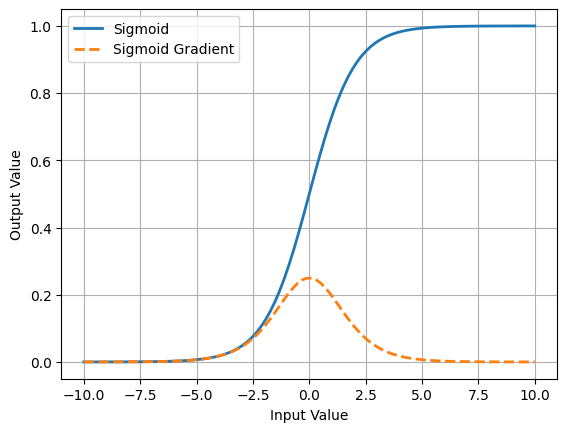

In [3]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoidGradient(x):
    return sigmoid(x)*(1 - sigmoid(x))

# Generate x values from -10 to 10
input_values = np.linspace(-10, 10, 100)

# Compute y values using the sigmoid function
y_sigmoid = sigmoid(input_values)

# Compute y values using the derivative of the sigmoid function
y_gradient = sigmoidGradient(input_values)

# Plot the sigmoid function and its derivative
# plt.figure(figsize=(8, 6))
plt.plot(input_values, y_sigmoid, label='Sigmoid', linewidth=2)
plt.plot(input_values, y_gradient, label='Sigmoid Gradient', linestyle='--', linewidth=2)
plt.xlabel('Input Value')
plt.ylabel('Output Value')
plt.grid(True)
plt.legend()
plt.show()

**Since the maximum value of the derivative is 0.25 there is a chance of vanishing gradient problem occuring.**

#### ***ReLU Function & Derivative***

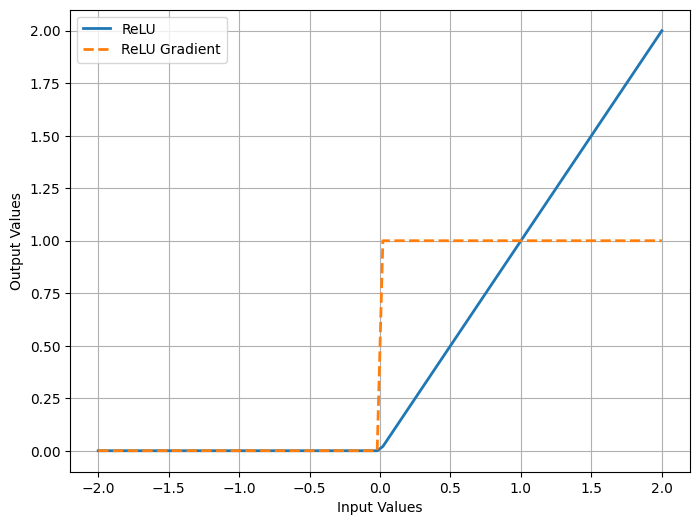

In [4]:

def relu(x):
    return np.maximum(0, x)

def reluGradient(x):
    return np.where(x > 0, 1, 0)

input_values = np.linspace(-2, 2, 100)

y_relu = relu(input_values)

# Compute y values for derivative of ReLU function
y_gradient = reluGradient(input_values)

plt.figure(figsize=(8, 6))
plt.plot(input_values, y_relu, label='ReLU', linewidth=2)
plt.plot(input_values, y_gradient, label='ReLU Gradient', linestyle='--', linewidth=2)
plt.xlabel('Input Values')
plt.ylabel('Output Values')
plt.grid(True)
plt.legend()
plt.show()

**Gradient is either 1 or 0**

**Now with ReLU, the gradient might become 0 and the nodes of the network might 'die' as they will not be updated.**

#### ***Leaky ReLU Function & Derivative***

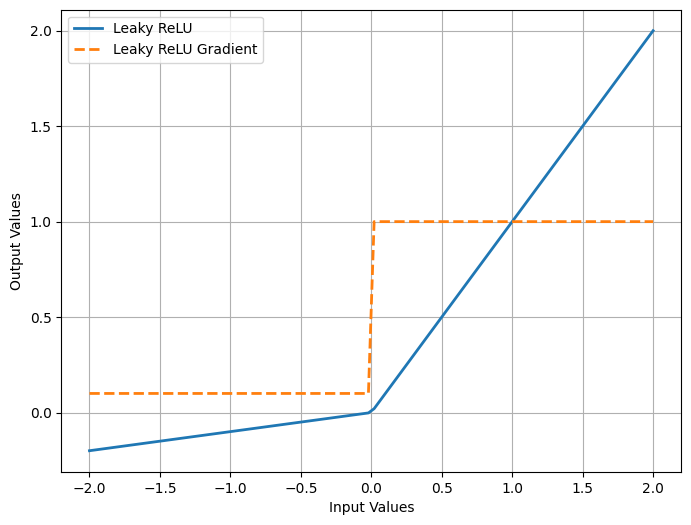

In [5]:
leakage = 0.1
def leakyRelu(x):
    return np.where(x > 0, x, leakage*x)

def leakyReluGradient(x):
    return np.where(x > 0, 1, leakage)

input_values = np.linspace(-2, 2, 100)

y_leaky_relu = leakyRelu(input_values)

# Compute y values for derivative of ReLU function
y_leaky_gradient = leakyReluGradient(input_values)

plt.figure(figsize=(8, 6))
plt.plot(input_values, y_leaky_relu, label='Leaky ReLU', linewidth=2)
plt.plot(input_values, y_leaky_gradient, label='Leaky ReLU Gradient', linestyle='--', linewidth=2)
plt.xlabel('Input Values')
plt.ylabel('Output Values')
plt.grid(True)
plt.legend()
plt.show()

**Gradient is either 1 or the leakage which is 0.1 i this case**

**Now the neurons might not die out as the gradient doesn't become 0 and the network keeps updating**